In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [20]:
df = pd.read_csv('../example_data/example_wp_log_peyton_manning.csv')

# Seasonality

##  Additive Seasonality

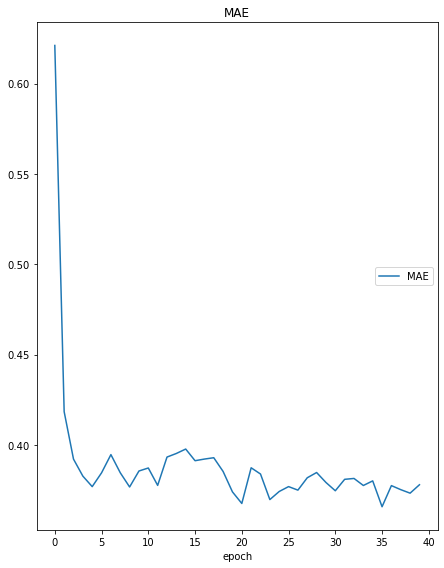

MAE
	MAE              	 (min:    0.366, max:    0.621, cur:    0.378)


,SmoothL1Loss,MAE,RegLoss
0,0.393008,0.621136,0.0
1,0.205669,0.418451,0.0
2,0.181797,0.392208,0.0
3,0.177808,0.382804,0.0
4,0.174753,0.376991,0.0
5,0.177761,0.384624,0.0
6,0.185649,0.394700,0.0
7,0.178702,0.384673,0.0
8,0.170781,0.376792,0.0
9,0.177844,0.385636,0.0


In [21]:
m = NeuralProphet()
metrics = m.fit(df)
metrics

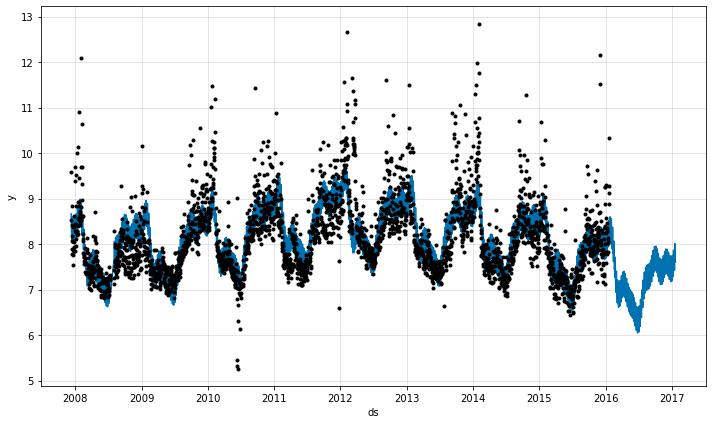

In [22]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

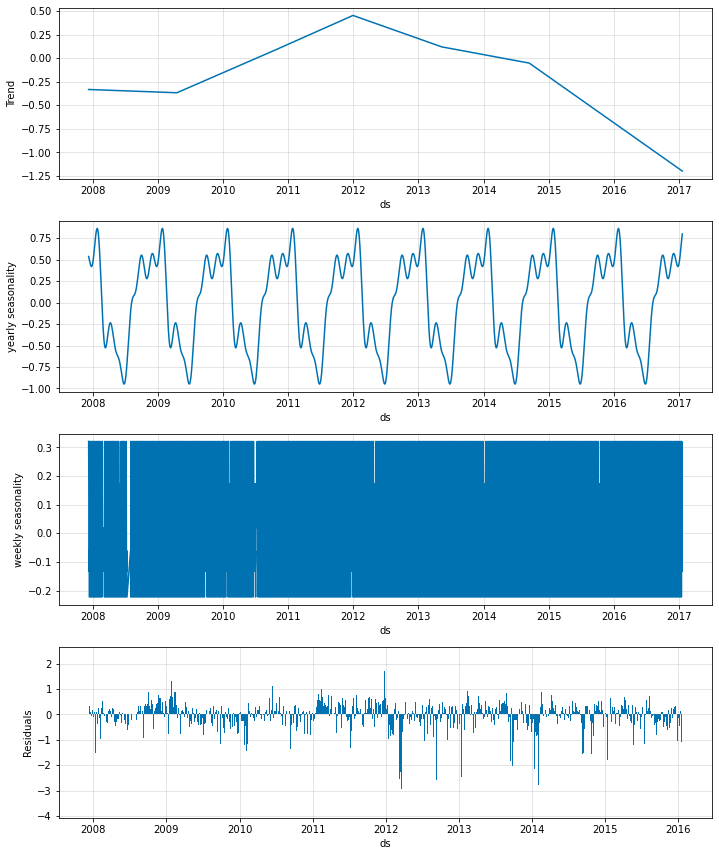

In [23]:
fig_comp = m.plot_components(forecast)

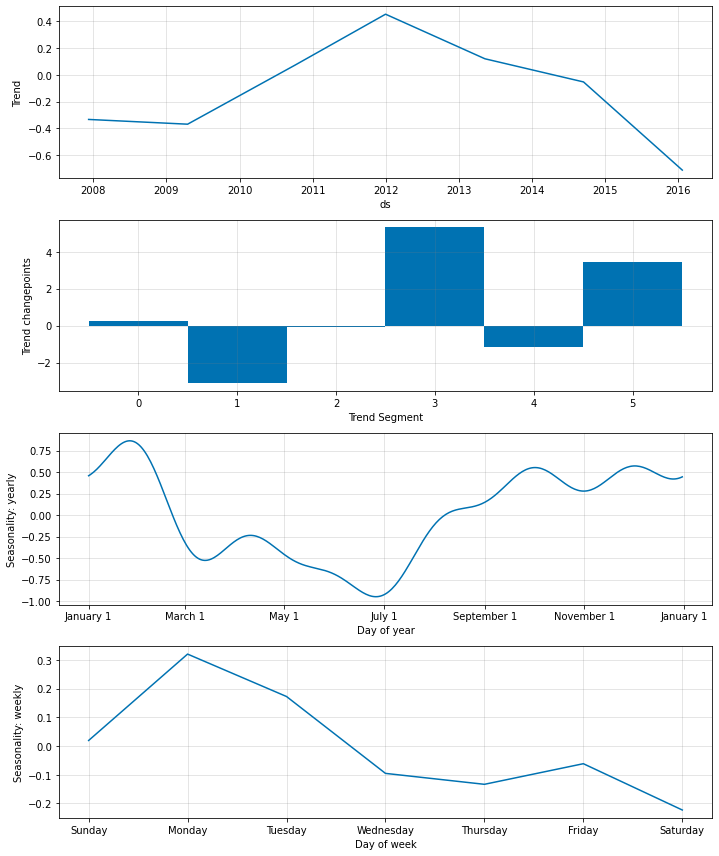

In [24]:
fig_param = m.plot_parameters()

##  Multiplicative Seasonality
Clearly, additive seasonality is the better fit for this data.

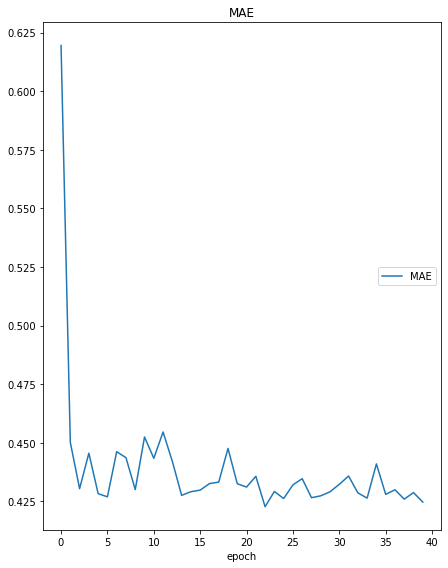

MAE
	MAE              	 (min:    0.423, max:    0.619, cur:    0.425)


In [6]:
m = NeuralProphet(
#     n_changepoints=0, 
    seasonality_mode='multiplicative',
)
metrics = m.fit(df)

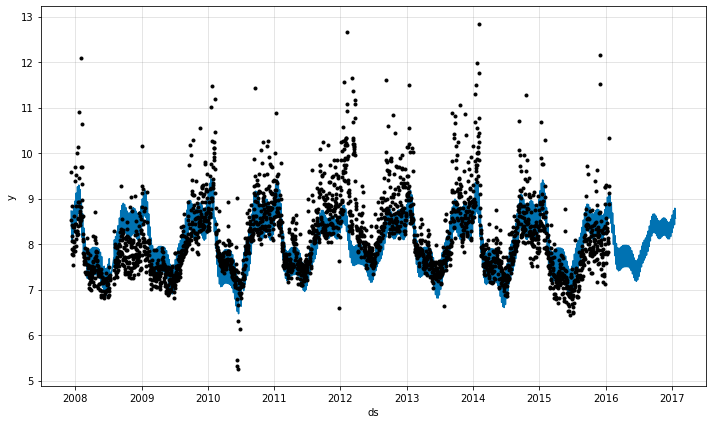

In [7]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

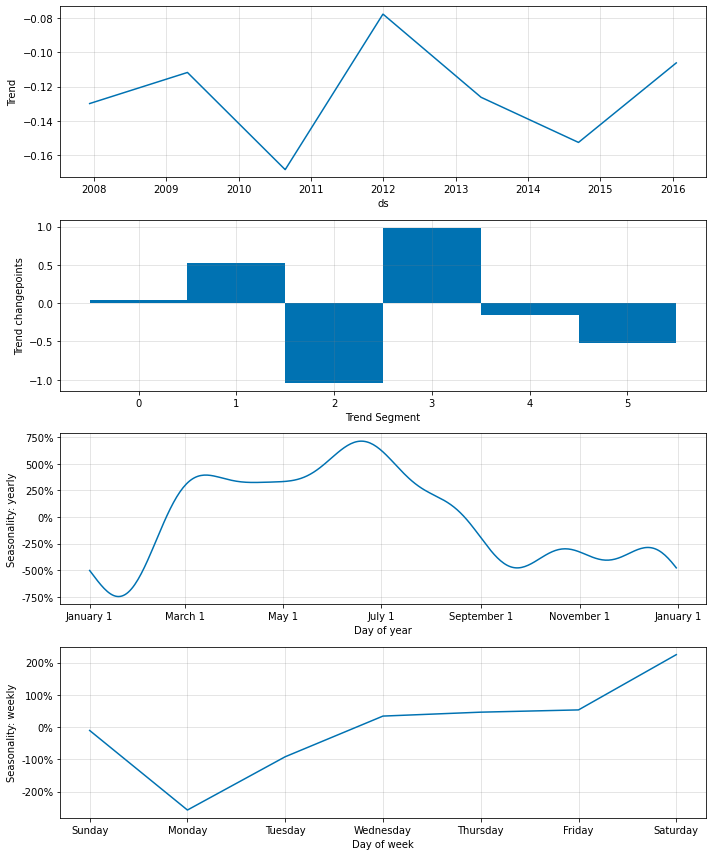

In [8]:
fig_param = m.plot_parameters()

##  Underfit Additive Seasonality

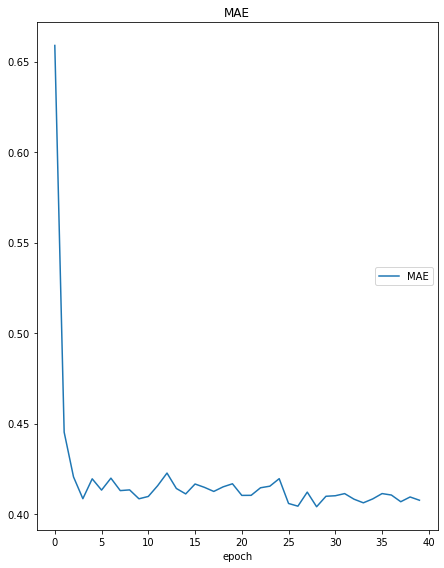

MAE
	MAE              	 (min:    0.404, max:    0.659, cur:    0.408)


In [9]:
m = NeuralProphet(
    yearly_seasonality=2,
    weekly_seasonality=1,
    daily_seasonality=False,
)
metrics = m.fit(df)

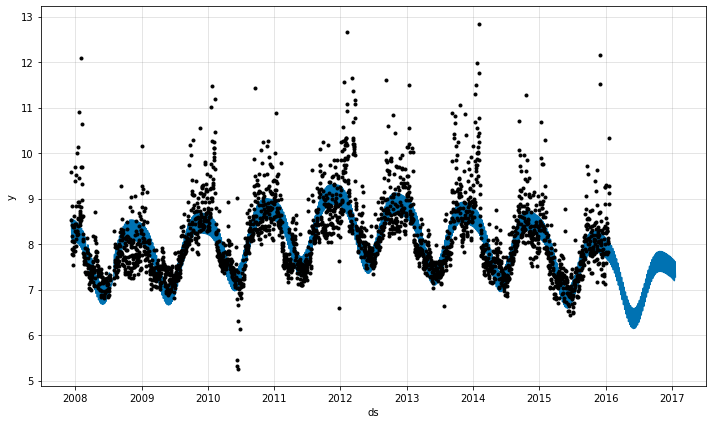

In [10]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

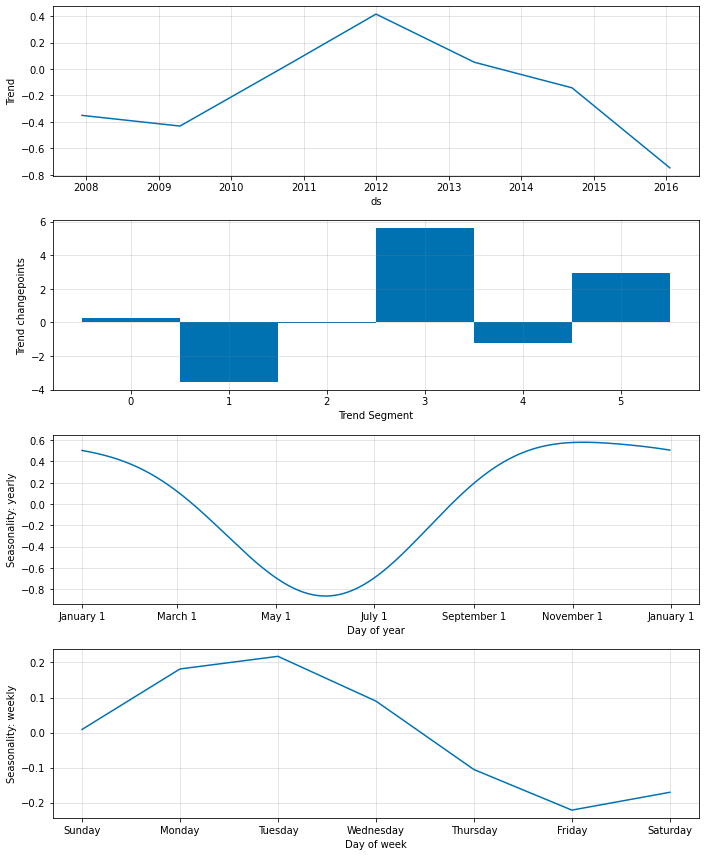

In [11]:
fig_param = m.plot_parameters()

##  Overfit Additive Seasonality

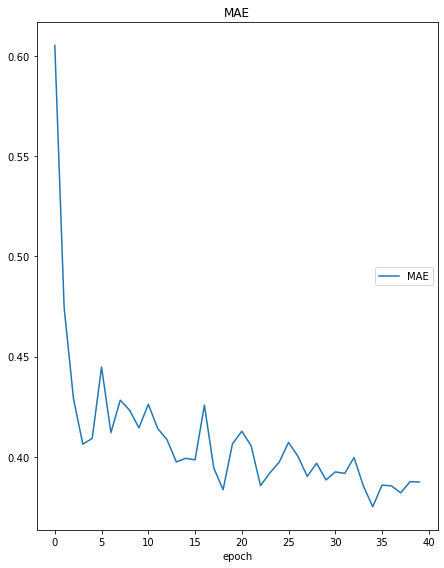

MAE
	MAE              	 (min:    0.375, max:    0.605, cur:    0.387)


In [12]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
)
metrics = m.fit(df)

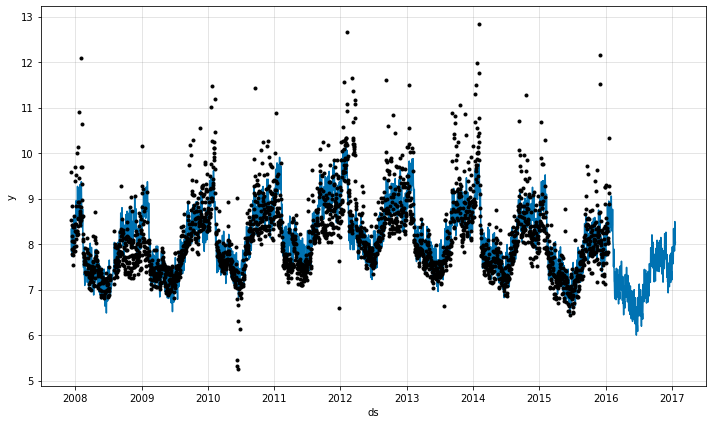

In [13]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

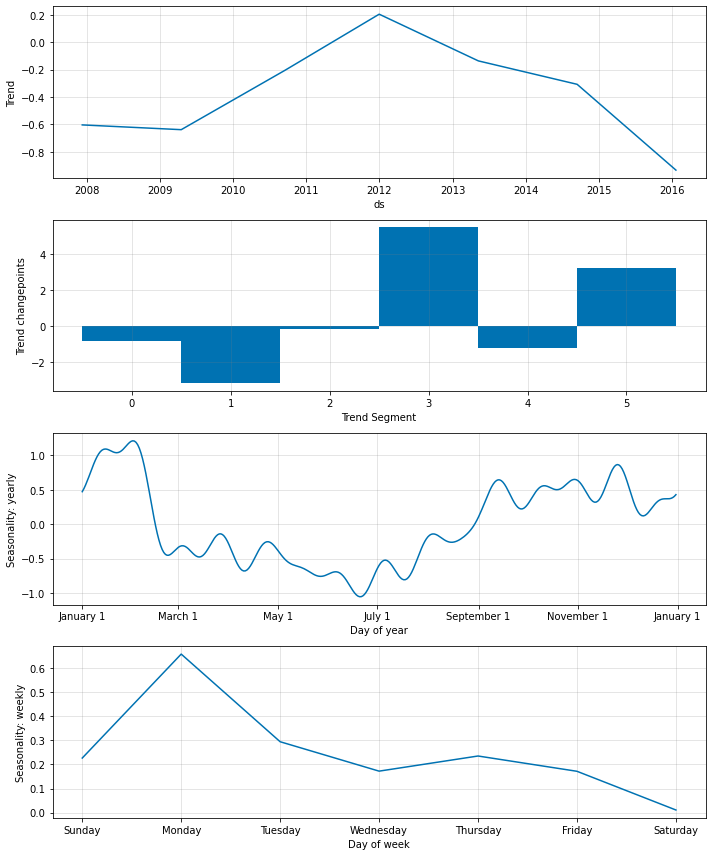

In [14]:
fig_param = m.plot_parameters()

In [15]:
print(sum(abs(m.model.season_params["yearly"].data.numpy())))
print(sum(abs(m.model.season_params["weekly"].data.numpy())))

# print(m.model.season_params["yearly"].data)
# print(m.model.season_params["weekly"].data)

3.263488703407347
2.5432021697051823


##  Regularized Additive Seasonality

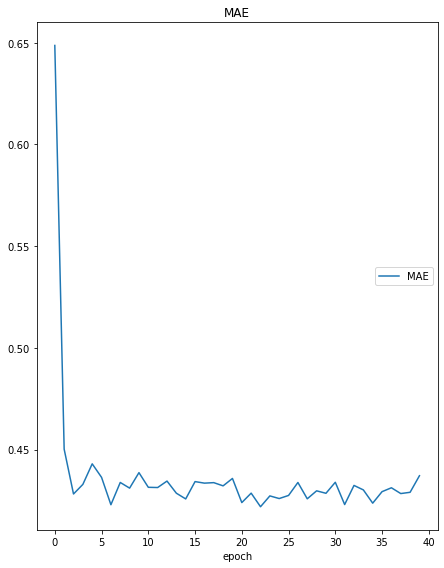

MAE
	MAE              	 (min:    0.422, max:    0.649, cur:    0.437)


In [16]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
    seasonality_reg=1,
)
metrics = m.fit(df)

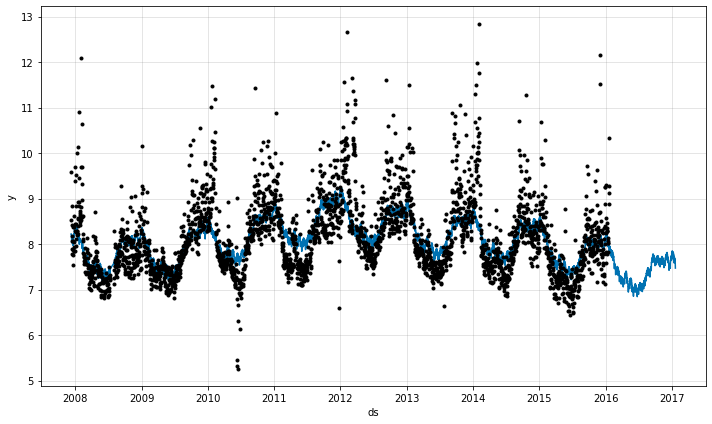

In [17]:
future = m.make_future_dataframe(df, future_periods=365, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)

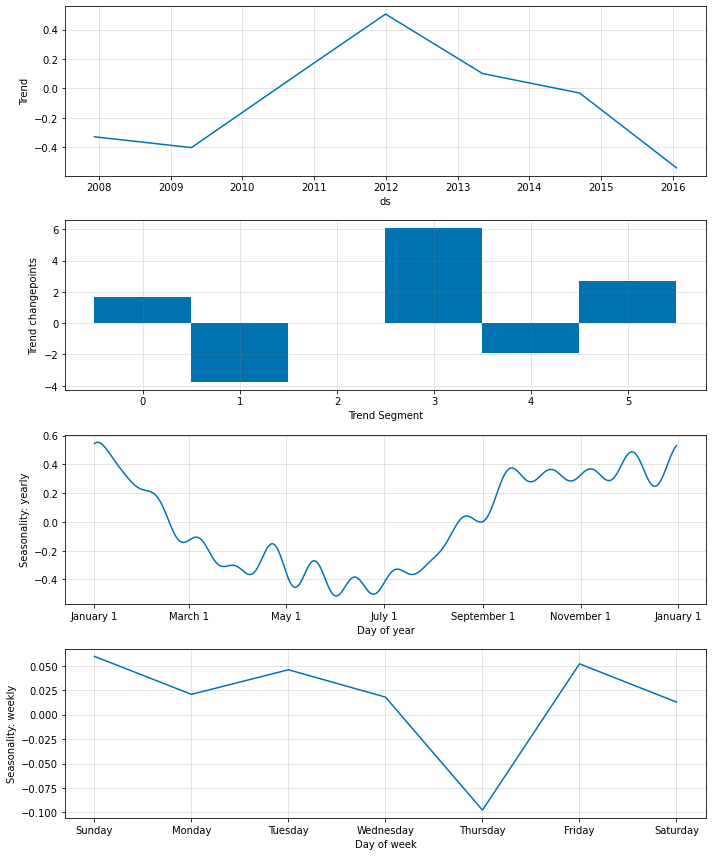

In [18]:
fig_param = m.plot_parameters()

In [19]:
print(sum(abs(m.model.season_params["yearly"].data.numpy())))
print(sum(abs(m.model.season_params["weekly"].data.numpy())))

# print(m.model.season_params["yearly"].data)
# print(m.model.season_params["weekly"].data)

1.3624659511260688
0.22059247002471238
